In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import math
from numpy import linalg as LA

In [538]:
def generate_data(n_obs, n_dim=2, case=1):
    # Two clusters(a & b),  ramdom_sample returns random floats in '[0.0, 1.0)'
    if case == 1:
        a = 2 * np.random.random_sample((n_obs//2, n_dim))
        b = np.random.random_sample((n_obs//2, n_dim)) + 3
        return np.vstack((a,b))
    
    # Three cluster of data, uneven cluster size
    elif case == 2:
        x = np.hstack((np.random.normal(-5, 1, 20), np.random.normal(3, 1, 20), np.random.normal(9, 2, 250)))
        y = np.hstack((np.random.normal(2, 1, 20), np.random.normal(-4, 1, 20),np.random.normal(8, 2, 250)))
        return np.stack((x,y)).T
    
    # A straight line
    elif case == 3:
        a = np.arange(n_obs)
        return np.stack((a,a)).T
    
    # Two circles with same center
    elif case == 4:
        rad1= np.linspace(0, 2 * np.pi, n_obs//3)
        rad2= np.linspace(0, 2 * np.pi, n_obs)
        r1, r2 = 1, 4
        x = np.hstack((r1 * np.cos(rad1),  r2 * np.cos(rad2)))
        y = np.hstack((r1 * np.sin(rad1),  r2 * np.sin(rad2)))
        return np.stack((x,y)).T
    
    # Non-clustered data
    elif case == 5:
        x = np.random.uniform(0, 4, n_obs)
        y = np.random.uniform(0, 4, n_obs)
        return np.stack((x,y)).T
        
    # A straight line with a breakpoint
    elif case == 6:
        a = np.arange(n_obs)
        a = np.hstack((a[:n_obs//2], a[n_obs//2+4:]))
        return np.stack((a,a)).T
    
    # Two lines
    elif case == 7:
        a = np.arange(n_obs//2)
        x1 = np.ones(n_obs//2) 
        x2 = 3*x1
        return np.hstack((np.stack((x1,a)), np.stack((x2,a)))).T
    
    # Two curves
    elif case == 8:
        xx = np.arange(20)
        y = np.hstack((np.sin(xx/14)-1, (xx+3)**2))
        x = np.hstack((xx+20,xx))
        return np.stack((x,y)).T
    
    # one dimenstion
    elif case == 9:
        x = np.hstack((np.arange(n_obs-1), n_obs*2))
        y = np.zeros(n_obs)
        return np.stack((x,y)).T
    
    # one dimenstion
    elif case == 10:
        xx = np.arange(-n_obs, n_obs)
        x = np.hstack((np.random.normal(0,1, n_obs//3), xx))
        y = np.hstack((np.random.normal(10,1, n_obs//3), xx**2/15))
        return np.stack((x,y)).T

In [152]:
def distance(Q, p):
    d = np.sum(np.square(Q - p), axis = 1)
    return d #array of distances

In [217]:
class KMeans:
    def __init__(self, X, k=2):
        self.X = X
        self.k = k
        self.train_size = X.shape[0]
        self.dim = X.shape[1]
        self.centers = np.zeros((self.k, self.dim))
        self.labels= np.zeros((self.train_size, 1))
        self.loss = float('inf')
        self.plot, self.axes = plt.subplots(1,2, figsize = (8,4)) 

    def init_centers(self):
#         random.seed(90)
        center_idx = random.sample(range(self.train_size), self.k)
        self.centers = self.X[center_idx]
        self.show_clusters(0)
        return 

    def update_cluster(self):                 
        labels_new = np.zeros((self.train_size,1))
        
        for i in range(self.train_size):
            dis = distance(self.centers, self.X[i])
            labels_new[i] = np.argmin(dis)
            loss = np.sum(dis) / self.train_size
            
        if (labels_new == self.labels).all():
            return False
        else:
            self.labels = labels_new
            return True 

    def update_center(self):
        change = False
        for i in range(self.k):
            cluster = self.X[(self.labels == i).reshape(1,-1)[0]]
            update_c = cluster.mean(axis = 0)
            if distance([self.centers[i]], update_c) > 1e-7:
                self.centers[i] = update_c
            change = True
        return change
    
    def update_loss(self):
        loss = 0
        for i in range(self.k):
            cluster =  self.X[(self.labels == i).reshape(1,-1)[0]]
            loss += distance(cluster, self.centers[i]).sum()
        self.loss = loss
        return loss
    
    def show_clusters(self, plot_num):
        for i in range(self.k):
            self.axes[plot_num].scatter(self.centers[i,0], self.centers[i,1], s=80, marker="x")
            coor = self.X[(self.labels == i).reshape(1,-1)[0]]
            self.axes[plot_num].scatter(coor[:,0], coor[:,1], s=30, alpha = 0.6)
            self.axes[plot_num].grid(ls="-.")
        plt.close()
    
    def fit(self, epoch = 10**5):
        print('%-3s'%'epoch', '%18s'%'update_cluster', '%15s'%'update_center', '%14s'%'loss')
            
        i_epoch = 0
        while self.loss > 0:
            i_epoch += 1
            change_cluster = self.update_cluster()
            change_center = self.update_center()
            loss = self.update_loss()
            print('  %-4d'%i_epoch, '%12s'%change_cluster, '%15s'%change_center, '%20f'%loss)
            
            if not change_cluster:
                print('Clustering Completed')
                self.show_clusters(1)
                break


In [210]:
def plot_clusters(X, labels, centers, k):
    fig, axes = plt.subplots(1,1, figsize = (4,4))
    for i in range(k):
#         axes.scatter(centers[i,0], centers[i,1], s=80, marker="x")
        coor = X[(labels == i).reshape(1,-1)[0]]
        axes.scatter(coor[:,0], coor[:,1], s=30, alpha = 0.6)
        axes.grid(ls="-.")
    return fig

In [211]:
def try_KMeans(n_obs, n_dim = 2, k = 2, case = 1):
    plt.style.use('seaborn')
    X = generate_data(n_obs, n_dim, case = case)
    KM = KMeans(X, k)
    KM.init_centers()
    KM.fit()
    return KM.plot

### ( b ) suboptimality of Lloyd’s method

* **Example dataset (with d = 1) for which Lloyd's algorithm is not able to improve the cluster assignment**

epoch     update_cluster   update_center           loss
  1            True            True           355.000000
  2           False            True           355.000000
Clustering Completed


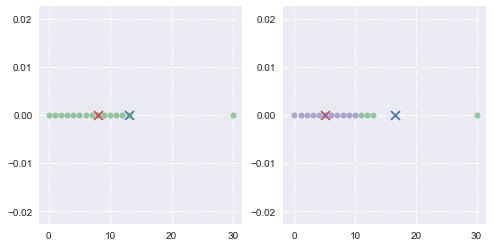

In [462]:
try_KMeans(15, k = 2, case = 9)

### ( c ) improving k-means quality

#### ( i ) Examples of datasets in $R^2$ for which optimal k-means setting results in an undesirable clustering.

* **Two concentric circles**

epoch     update_cluster   update_center           loss
  1            True            True           562.156604
  2            True            True           552.584579
  3            True            True           545.412057
  4            True            True           540.924613
  5            True            True           540.364536
  6            True            True           537.797744
  7           False            True           537.797744
Clustering Completed


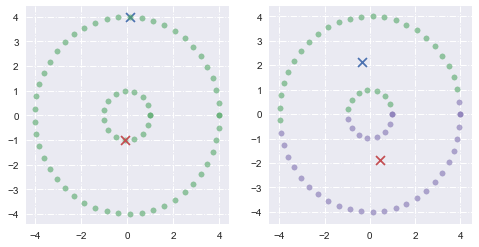

In [77]:
try_KMeans(50,2,case = 4)

In [91]:
#try_KMeans(50,2,case = 1)

* **Three clusters of data, uneven cluster size**

epoch     update_cluster   update_center           loss
  1            True            True          5681.117048
  2            True            True          3518.799644
  3            True            True          2298.430620
  4            True            True          2023.700906
  5            True            True          2013.950207
  6            True            True          2013.009292
  7            True            True          2011.666751
  8            True            True          2007.097246
  9            True            True          1997.213734
  10           True            True          1993.787589
  11           True            True          1992.402148
  12           True            True          1992.345640
  13          False            True          1992.345640
Clustering Completed


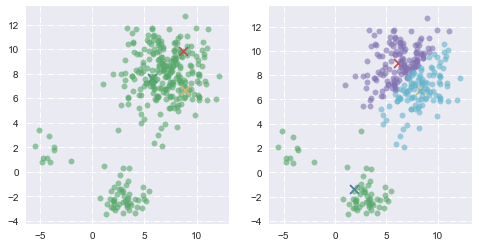

In [253]:
try_KMeans(200, 2, k = 3, case = 2)

* **Non-cluster data (coordinates uniformly distributted)**

epoch     update_cluster   update_center           loss
  1            True            True           652.818026
  2            True            True           538.855502
  3            True            True           534.328420
  4            True            True           530.941760
  5            True            True           528.286514
  6            True            True           527.288682
  7            True            True           526.252593
  8            True            True           524.508924
  9            True            True           522.455355
  10           True            True           520.766490
  11           True            True           517.619405
  12           True            True           513.724555
  13           True            True           512.117105
  14           True            True           510.754960
  15           True            True           509.773639
  16           True            True           509.151361
  17           True            T

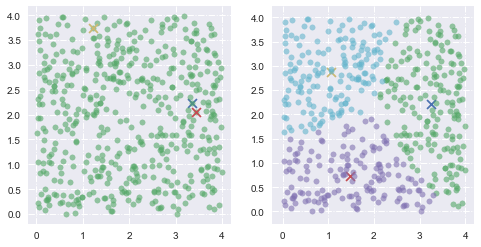

In [81]:
try_KMeans(500, n_dim = 2, k = 3, case = 5)

epoch     update_cluster   update_center           loss
  1            True            True        748488.075368
  2            True            True        182166.602174
  3            True            True        153780.599264
  4           False            True        153780.599264
Clustering Completed


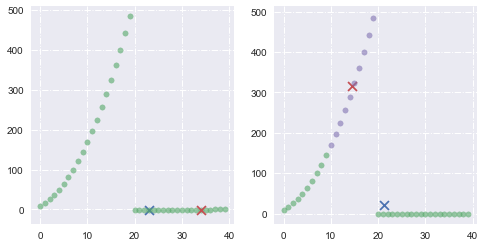

In [458]:
try_KMeans(500, n_dim = 2, k = 2, case = 8)

epoch     update_cluster   update_center           loss
  1            True            True          4650.720352
  2            True            True          4488.011530
  3            True            True          4434.589301
  4            True            True          4395.512132
  5            True            True          4368.220534
  6            True            True          4350.667878
  7           False            True          4350.667878
Clustering Completed


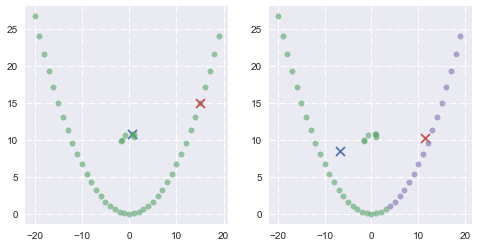

In [494]:
try_KMeans(20, k = 2, case = 10)

* **One straight line**

epoch     update_cluster   update_center           loss
  1            True            True          8800.000000
  2            True            True          6100.000000
  3            True            True          5450.000000
  4            True            True          5300.000000
  5            True            True          5250.000000
  6           False            True          5250.000000
Clustering Completed


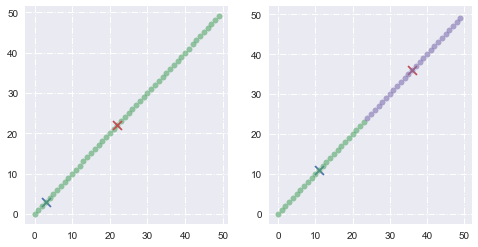

In [84]:
try_KMeans(50,2,case = 3)

* **Other examples**

epoch     update_cluster   update_center           loss
  1            True            True          5574.000000
  2            True            True          4462.000000
  3            True            True          4140.000000
  4           False            True          4140.000000
Clustering Completed


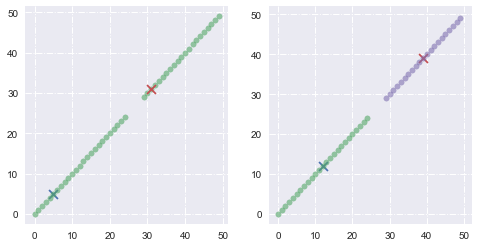

In [89]:
# Straight line with breakpoint
try_KMeans(50, n_dim = 2, k = 2, case = 6)

In [584]:
def try_spectral_cluster(n_obs, n_dim, k = 2, r = 4, case = 4):
    plt.style.use('seaborn')
    X = generate_data(n_obs, n_dim, case = case)
    
    SC = Spectral_Clustering(X, k ,r)
    SC.create_Gr_W_D_L(r)
    SC.create_V(k)
    KM = KMeans(SC.V, k)
    KM.init_centers()
    KM.fit()
    plt.show()
    plot_clusters(X, KM.labels, KM.centers, k)
    return KM.plot
    

In [624]:
class Spectral_Clustering:
    def __init__(self, X, k, r):
        self.X = X
        self.k = k
        self.r = r
        self.train_size = X.shape[0]
        self.dim = X.shape[1]
        self.labels = np.zeros((self.train_size, 1))
        self.Gr = np.zeros((self.train_size, self.train_size))
        self.W = np.zeros((self.train_size, self.train_size))
        self.D = np.zeros((self.train_size, self.train_size))
        self.L = np.zeros((self.train_size, self.train_size))
        self.V = np.zeros((self.train_size, self.k))
    
    def create_Gr_W_D_L(self, r):
        for i in range(self.train_size):
            dis = distance(self.X, self.X[i])
            dis_sort = np.sort(dis)
            r_near = 1* (dis < dis_sort[r+1])
            self.Gr[i] = r_near * dis
            self.W[i] = r_near
            self.W[i][i] = 0
        self.W = 1*((self.W.T + self.W)>0)
        self.D[i,i] = self.W[i].sum()
        self.L = self.D - self.W
    
    def create_V(self, k):
        eig_val, eig_vect = LA.eig(self.L)
        self.V = eig_vect.T[eig_val < np.sort(eig_val)[k]].T
     

epoch     update_cluster   update_center           loss
  1            True            True             0.493193
  2            True            True             0.129229
  3           False            True             0.129229
Clustering Completed


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: ComplexWarning: Casting complex values to real discards the imaginary part


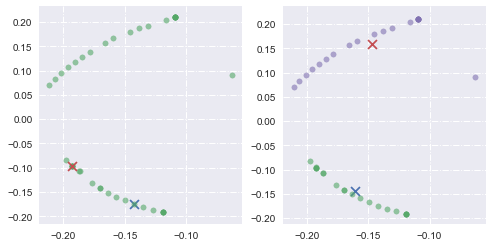

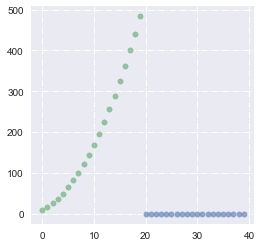

In [459]:
try_spectral_cluster(200, n_dim = 2, k = 2, r = 20, case = 8)

epoch     update_cluster   update_center           loss
  1            True            True             1.019150
  2            True            True             0.868065
  3            True            True             0.740277
  4            True            True             0.243130
  5           False            True             0.243130
Clustering Completed


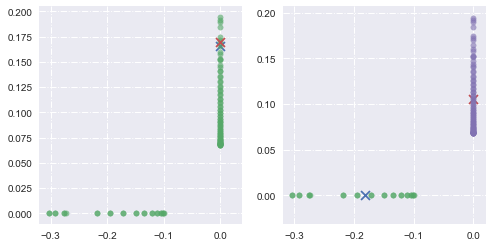

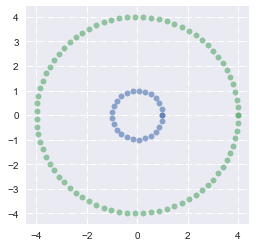

In [583]:
try_spectral_cluster(80, n_dim = 2, k = 2, r = 6, case = 4)

epoch     update_cluster   update_center           loss
  1            True            True             1.413706
  2            True            True             0.964254
  3            True            True             0.930725
  4           False            True             0.930725
Clustering Completed


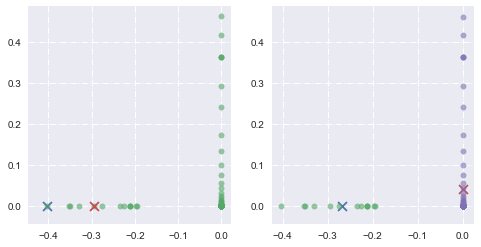

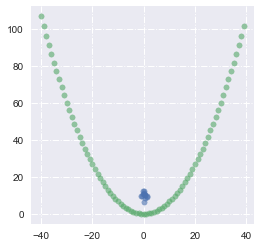

In [495]:
try_spectral_cluster(40, n_dim = 2, k = 2, r = 5, case = 10)